# New tutorial
This tutorial shows how to read, interpolate and visualize bathymetry data obtained from the [Canadian Hydrographic Service](https://open.canada.ca/data/en/dataset/d3881c4c-650d-4070-bf9b-1e00aabf0a1d)


*** generating dummy temperature data ***
*** generating dummy salinity data *** 


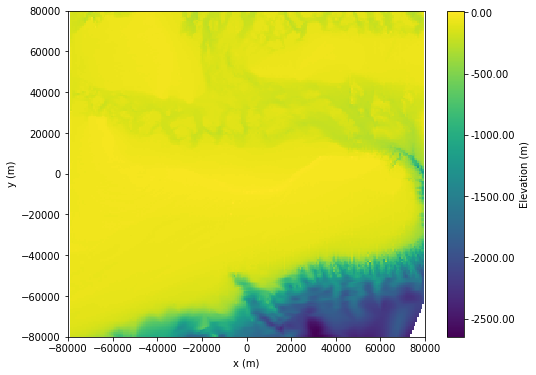

In [2]:
import numpy as np
from kadlu.geospatial.data_provider import DataProvider
from kadlu.geospatial.geospatial import plot
import matplotlib.pyplot as plt

# folder where the GeoTIFF files are stored
folder = 'assets/'

# initialize the data provider
provider = DataProvider(folder, south=43, north=45, west=-61, east=-59, bathy_source="CHS", interpolation_method='cubic')

# interpolate bathymetry on a planar 201 x 201 grid, covering an area of 80km x 80km 
x = np.arange(start=-100, stop=101, step=1) * 800
y = x.copy() 
z = provider.bathy(x=x, y=y, grid=True, geometry='planar')

# make the figure
plot(x=x, y=y, z=z)

# draw it
plt.show()

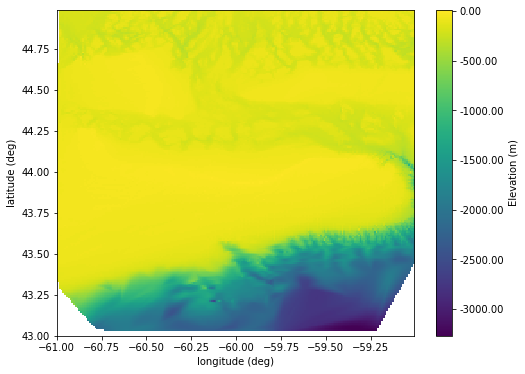

In [3]:
# interpolate bathymetry on a spherical 200 x 200 grid, covering 43 to 45 deg N and -61 to -59 deg E
lon = np.arange(start=-61, stop=-59, step=0.01)
lat = np.arange(start=43, stop=45, step=0.01)
z = provider.bathy(x=lon, y=lat, grid=True, geometry='spherical')

# flip bathy matrix
z = np.swapaxes(z, 0, 1)

# make the figure
plot(x=lon, y=lat, z=z, x_label='longitude (deg)', y_label='latitude (deg)')

# draw it
plt.show()